Creating and Backtesting simple Momentum/Contrarian Strategies


Getting the Data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [6]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


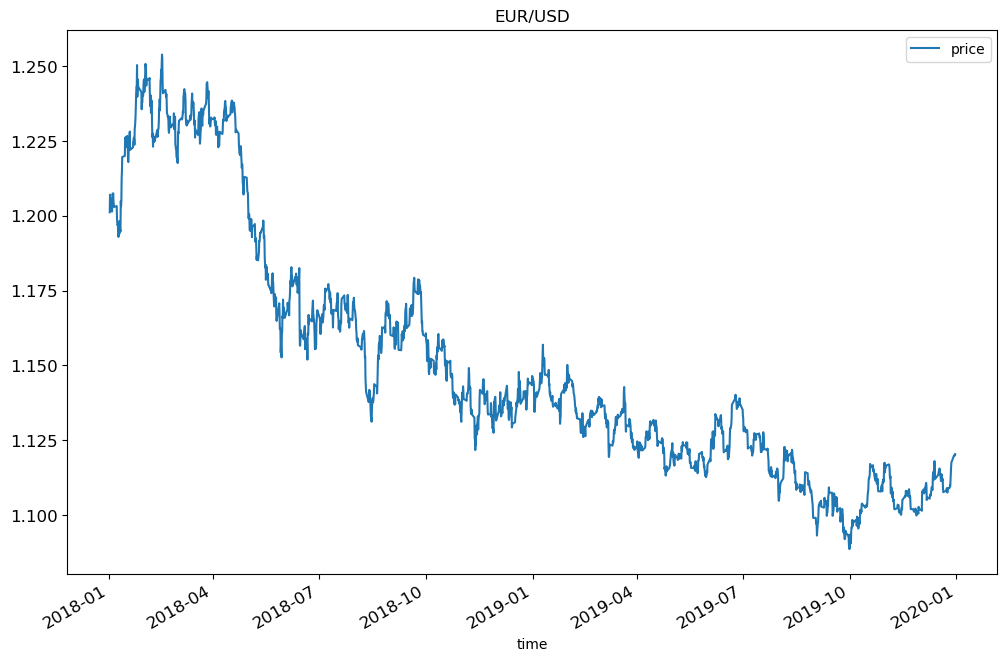

In [10]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

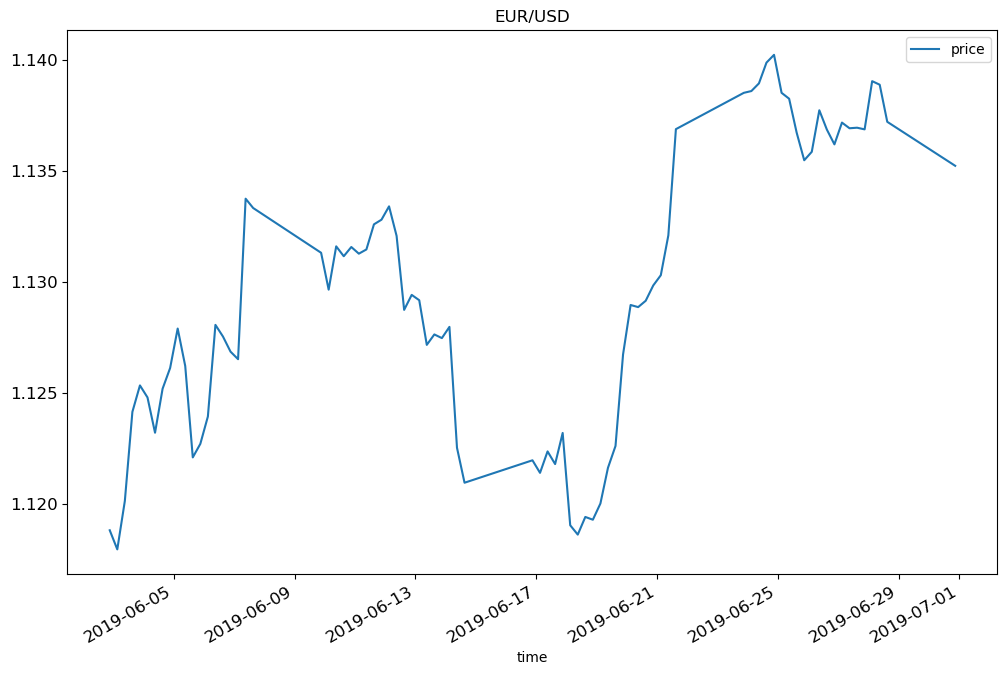

In [12]:
data.loc["2019-06"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [14]:
data["returns"] = np.log(data.div(data.shift(1)))

In [16]:
data.dropna(inplace = True)

In [18]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


Getting historical data from Oanda

In [21]:
import tpqoa
import os

In [23]:
file_path = r"C:\Users\audri\Desktop\AutoTrader\oanda\oanda.cfg"
print(os.path.exists(file_path))  # Should return True

True


In [25]:
api = tpqoa.tpqoa(r"C:\Users\audri\Desktop\AutoTrader\oanda\oanda.cfg")

In [27]:
api

In [29]:
df = api.get_history(instrument = "EUR_USD", start = "2021-01-14", end = "2021-01-15",
                    granularity = "M5", price = "B")

In [31]:
df

,o,h,l,c,volume,complete
time,,,,,,
2021-01-14 00:00:00,1.21611,1.21616,1.21594,1.21599,140,True
2021-01-14 00:05:00,1.21600,1.21605,1.21594,1.21605,29,True
2021-01-14 00:10:00,1.21606,1.21651,1.21606,1.21644,196,True
2021-01-14 00:15:00,1.21643,1.21677,1.21628,1.21677,163,True
2021-01-14 00:20:00,1.21674,1.21688,1.21670,1.21686,149,True
...,...,...,...,...,...,...
2021-01-14 23:35:00,1.21505,1.21517,1.21502,1.21516,39,True
2021-01-14 23:40:00,1.21515,1.21524,1.21504,1.21509,53,True
2021-01-14 23:45:00,1.21507,1.21520,1.21507,1.21511,31,True


In [33]:
close = df.c.to_frame()
close

,c
time,
2021-01-14 00:00:00,1.21599
2021-01-14 00:05:00,1.21605
2021-01-14 00:10:00,1.21644
2021-01-14 00:15:00,1.21677
2021-01-14 00:20:00,1.21686
...,...
2021-01-14 23:35:00,1.21516
2021-01-14 23:40:00,1.21509
2021-01-14 23:45:00,1.21511


In [35]:
close.resample("20min").last()

,c
time,
2021-01-14 00:00:00,1.21677
2021-01-14 00:20:00,1.21654
2021-01-14 00:40:00,1.21639
2021-01-14 01:00:00,1.21697
2021-01-14 01:20:00,1.21661
...,...
2021-01-14 22:20:00,1.21526
2021-01-14 22:40:00,1.21502
2021-01-14 23:00:00,1.21543


////////////////////////////////////

Defining a simple Contrarian Strategy

In [39]:
window = 3

In [41]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [43]:
data["returns"].rolling(window).mean()

time
2018-01-02 04:00:00+00:00             NaN
2018-01-02 10:00:00+00:00             NaN
2018-01-02 16:00:00+00:00    1.272676e-03
2018-01-02 22:00:00+00:00   -6.537454e-04
2018-01-03 04:00:00+00:00   -1.702470e-04
                                 ...     
2019-12-29 22:00:00+00:00    1.808598e-03
2019-12-30 04:00:00+00:00    1.085156e-03
2019-12-30 10:00:00+00:00    7.492899e-04
2019-12-30 16:00:00+00:00   -1.484453e-17
2019-12-30 22:00:00+00:00    1.234956e-04
Name: returns, Length: 2069, dtype: float64

In [72]:
data["position"] = -np.sign(data["returns"].rolling(window).mean()) # contrarian without a - sign it would be a simple momentum strg

In [74]:
data

,price,returns,positions,strategy,position
time,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN,-1.0
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0


///////////////////////////

Vectorized Strategy Backtesting

In [78]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [80]:
data

,price,returns,positions,strategy,position
time,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN,-1.0
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0


In [82]:
data.dropna(inplace = True)

In [84]:
data

,price,returns,positions,strategy,position
time,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,1.0
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,1.0
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,1.0
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0


In [86]:
data[["returns", "strategy"]].sum()

returns    -0.073498
strategy    0.096236
dtype: float64

In [88]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.929138
strategy    1.101019
dtype: float64

In [90]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [92]:
data

,price,returns,positions,strategy,position,creturns,cstrategy
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,1.0,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,1.0,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,1.0,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,1.0,0.996392,0.998229
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0,0.928923,1.100420


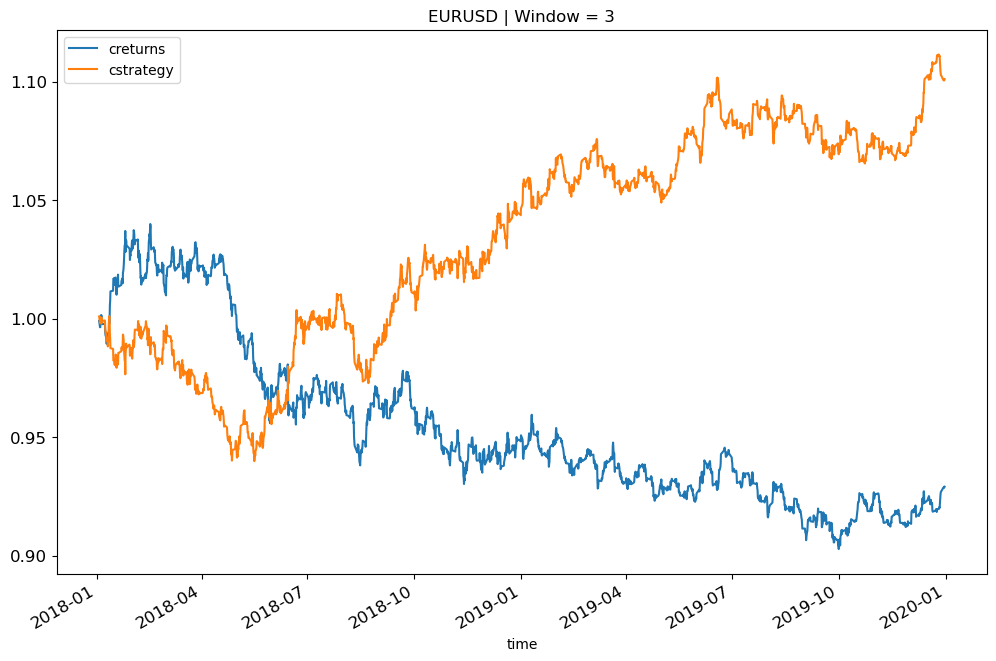

In [96]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8),
                                    title = "EURUSD | Window = {}".format(window), fontsize = 12)
plt.show()